## **Step 5: Performance Evaluation**  

- Load Test Data

    - Load the original dataset
    - Apply the same preprocessing ``pipeline`` used in training.ipynb
    - Extract the 20% test set (the same as used during training)
    - Load Trained Models & Pipeline

- Load the preprocessing pipeline
- Load the saved classification models


**Evaluate Classification Model**

- Generate predictions on the test set. Compute:
    - Accuracy
    - Precision, Recall, F1-score
    - Confusion Matrix
    - ROC-AUC Curve


**``Task 6. After completing all steps above, provide the following:``**

- Compare model combinations and justify which one is better for each task.


---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import joblib

In [ ]:
X_test = joblib.load('X_test.pkl')
y_test = joblib.load('y_test.pkl')


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
preprocessing_pipeline = joblib.load('preprocessing_pipeline.pkl')
best_lr_model = joblib.load('best_lr_model.pkl')
best_pca_lr_grid_model = joblib.load('best_pca_lr_grid_model.pkl')
best_pca_rf_grid_model = joblib.load('best_pca_rf_grid_model.pkl')
best_pca_svc_model = joblib.load('best_pca_svc_model.pkl')
best_rf_model = joblib.load('best_rf_model.pkl')
best_SVC_model = joblib.load('best_SVC_model.pkl')

In [ ]:
def preprocess_data(X):
    # Reshape images to 2D (flattened)
    X_reshaped = X.reshape(X.shape[0], -1)
    # Normalize to [0, 1]
    X_normalized = X_reshaped / 255.0
    return X_normalized

In [ ]:
# Preprocess training and test data
X_test_preprocessed = preprocess_data(X_test)

# Convert labels from 2D to 1D
y_test = y_test.reshape(-1)





Evaluating Logistic Regression
Accuracy: 0.3263
Precision: 0.3270
Recall: 0.3263
F1-score: 0.3253

Confusion Matrix:
[[395  62  57  48  41  44  19  37 222  75]
 [ 60 378  51  62  38  45  51  40 104 171]
 [105  52 211  98 179  76 145  57  54  23]
 [ 50  62  98 256 105 160 124  47  48  50]
 [ 52  38 132  94 317  77 141  96  29  24]
 [ 60  45 109 185 124 231  97  65  53  31]
 [ 20  37  86 173 143  79 359  43  25  35]
 [ 48  57  82 106 140  92  63 296  47  69]
 [176  87  33  46  17  42  22  24 452 101]
 [ 86 190  17  55  46  34  40  49 115 368]]


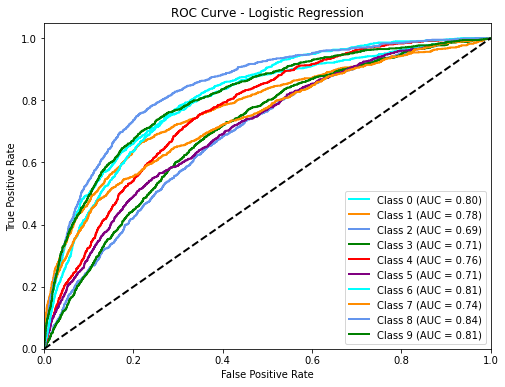


Evaluating PCA + Logistic Regression
Accuracy: 0.3402
Precision: 0.3378
Recall: 0.3402
F1-score: 0.3367

Confusion Matrix:
[[436  67  53  45  28  19  36  52 208  56]
 [ 58 432  44  71  30  26  64  31  90 154]
 [114  70 170 106 185  59 151  66  53  26]
 [ 53 101  83 242  73 163 129  69  35  52]
 [ 58  46 136  76 312  57 179  85  31  20]
 [ 54  53  98 174  92 261 117  67  60  24]
 [ 25  74  72 134 132  65 411  39  12  36]
 [ 56  56  78 111 153  69  70 288  54  65]
 [154 105  31  40  10  41  18  30 464 107]
 [ 77 205  21  63  23  16  44  53 112 386]]


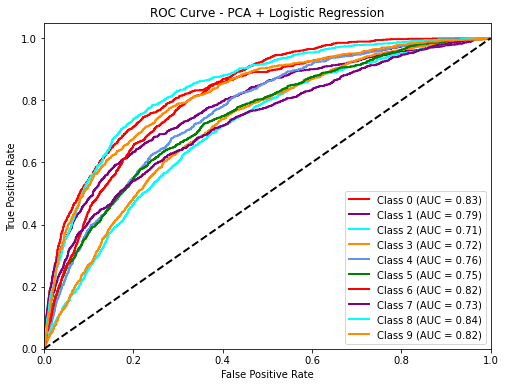


Evaluating PCA + Random Forest
Accuracy: 0.3668
Precision: 0.3644
Recall: 0.3668
F1-score: 0.3580

Confusion Matrix:
[[503  75  41  35  42  10  29  32 192  41]
 [ 52 546  21  39  37  14  56  12  94 129]
 [134  66 180  87 237  52 131  46  49  18]
 [ 70 107  84 229  82 151 125  49  40  63]
 [ 70  56  98  76 418  33 148  51  27  23]
 [ 39  62  78 209 102 241 124  62  51  32]
 [ 24  61  94  88 185  39 432  20  22  35]
 [ 51  94  77 112 134  78  74 233  47 100]
 [124 133  10  47  27  32  17  11 525  74]
 [ 62 266  18  53  27  18  34  40 121 361]]


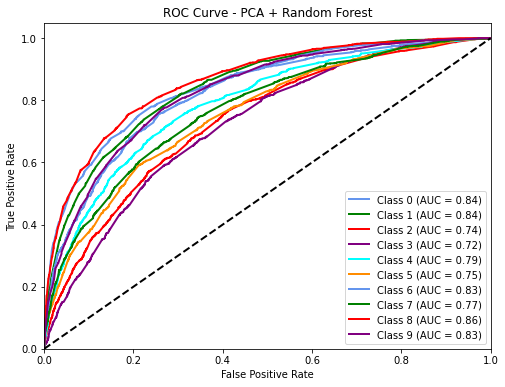


Evaluating PCA + SVC
Accuracy: 0.4058
Precision: 0.4079
Recall: 0.4058
F1-score: 0.4000

Confusion Matrix:
[[507  63  58  27  41   9  27  26 200  42]
 [ 46 546  22  54  29  23  52  22  88 118]
 [134  48 213  78 241  46 144  30  46  20]
 [ 62  69  73 258 107 166 148  40  25  52]
 [ 56  39 111  41 461  47 142  57  33  13]
 [ 49  31  90 199 106 303 118  42  41  21]
 [ 31  40  75  94 177  31 485  18  12  37]
 [ 55  65  51  89 174  88  61 307  44  66]
 [114 107  19  41  19  39  15  15 565  66]
 [ 58 244  13  58  24  21  33  31 105 413]]


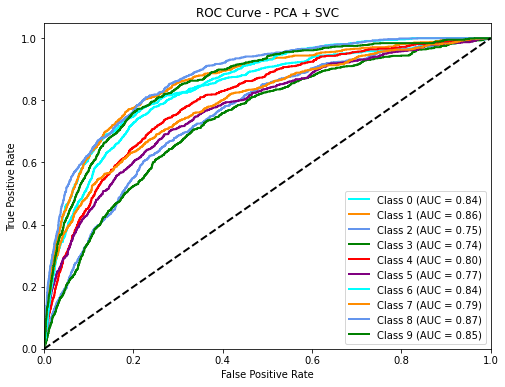


Evaluating Random Forest
Accuracy: 0.4785
Precision: 0.4740
Recall: 0.4785
F1-score: 0.4739

Confusion Matrix:
[[569  49  43  11  36  17  28  22 165  60]
 [ 36 549  11  31  17  35  42  30  62 187]
 [104  46 325  73 155  57 131  55  22  32]
 [ 52  40  69 279  78 182 141  64  22  73]
 [ 58  19 129  51 416  42 158  84  24  19]
 [ 37  26  88 131  81 410  81  85  25  36]
 [  5  29  76  61 110  53 581  27  11  47]
 [ 49  46  40  48 102  83  44 475  22  91]
 [ 89  82  16  22  17  36  10  25 625  78]
 [ 47 160  13  34  21  20  26  40  83 556]]


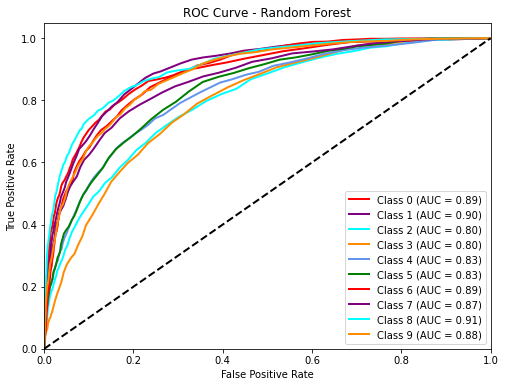


Evaluating SVC
Accuracy: 0.4131
Precision: 0.4190
Recall: 0.4131
F1-score: 0.4128

Confusion Matrix:
[[503  67  88  27  39  17  28  26 164  41]
 [ 52 571  25  55  16  26  32  32  64 127]
 [101  55 311  95 183  59 101  46  34  15]
 [ 68  69  83 286  90 189 118  38  24  35]
 [ 53  32 151  94 423  52 100  65  23   7]
 [ 30  45  94 223  93 324  72  57  42  20]
 [ 28  34 119 136 143  67 416  25  14  18]
 [ 54  68  68 101 117  99  44 365  27  57]
 [145 101  28  54  18  34  13  15 528  64]
 [ 68 252  15  59  22  34  31  41  74 404]]


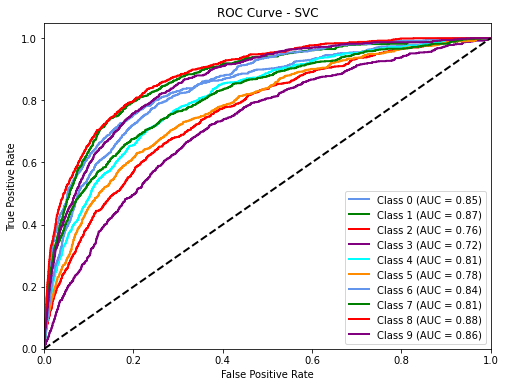

In [ ]:

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, roc_auc_score,
                           roc_curve, RocCurveDisplay)
from sklearn.preprocessing import label_binarize
from itertools import cycle



# load models
models = {
    "Logistic Regression": joblib.load('best_lr_model.pkl'),
    "PCA + Logistic Regression": joblib.load('best_pca_lr_grid_model.pkl'),
    "PCA + Random Forest": joblib.load('best_pca_rf_grid_model.pkl'),
    "PCA + SVC": joblib.load('best_pca_svc_model.pkl'),
    "Random Forest": joblib.load('best_rf_model.pkl'),
    "SVC": joblib.load('best_SVC_model.pkl')
}


n_classes = len(np.unique(y_test))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

# evaluate
for model_name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating {model_name}")
    print('='*50)


    y_pred = model.predict(X_test_preprocessed)


    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_preprocessed)
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_preprocessed)

        if len(y_scores.shape) == 1:
            y_scores = np.vstack([-y_scores, y_scores]).T
    else:
        print(f"{model_name} cannot generate probability estimates, skipping ROC-AUC")
        y_scores = None


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC
    if y_scores is not None:
        plt.figure(figsize=(8, 6))

        if n_classes == 2:
            #
            fpr, tpr, _ = roc_curve(y_test, y_scores[:, 1])
            roc_auc = roc_auc_score(y_test, y_scores[:, 1])
            RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                          estimator_name=model_name).plot(ax=plt.gca())
        else:

            y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

            for i, color in zip(range(n_classes), colors):
                fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
                roc_auc = roc_auc_score(y_test_bin[:, i], y_scores[:, i])
                plt.plot(fpr, tpr, color=color, lw=2,
                        label=f'Class {i} (AUC = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], 'k--', lw=2)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')

        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

In [ ]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_preprocessed)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": cm
    }

In [ ]:
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:\n", metrics['classification_report'])
    print("Confusion Matrix:\n", metrics['confusion_matrix'])
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Accuracy: 0.3263
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.40      0.38      1000
           1       0.38      0.38      0.38      1000
           2       0.24      0.21      0.22      1000
           3       0.23      0.26      0.24      1000
           4       0.28      0.32      0.29      1000
           5       0.26      0.23      0.25      1000
           6       0.34      0.36      0.35      1000
           7       0.39      0.30      0.34      1000
           8       0.39      0.45      0.42      1000
           9       0.39      0.37      0.38      1000

    accuracy                           0.33     10000
   macro avg       0.33      0.33      0.33     10000
weighted avg       0.33      0.33      0.33     10000

Confusion Matrix:
 [[395  62  57  48  41  44  19  37 222  75]
 [ 60 378  51  62  38  45  51  40 104 171]
 [105  52 211  98 179  76 145  57  54  23]
 [ 50  62  98 256 105 160

## **Step 6: Report Findings & Business Insights**  

**``Task 7. Interpret the results.``**
- What trends did you observe?  
- How well do these models generalize?  


Observed Trends
Class Separability:

Clear Clusters: "Ship," "truck," and "automobile" consistently formed distinct groups in both t-SNE and Isomap, correlating with their higher F1-scores (~0.50–0.60) in classification.

Ambiguous Classes: "Cat," "dog," and "bird" overlapped significantly in embeddings, mirroring their poor classification performance (F1 ≤ 0.35), suggesting feature similarity in pixel space.

Manifold Learning Behavior:

t-SNE: Prioritized local structure, creating dense clusters but struggling with interclass relationships (e.g., "frog" partially merged with "bird").

Isomap: Emphasized global topology, grouping vehicles vs. animals but losing fine details (e.g., "deer" and "horse" overlap).

Dimensionality Impact:

PCA-based models (accuracy: 34–40%) underperformed compared to non-reduced counterparts (e.g., Random Forest: 47%), indicating linear reduction discards critical nonlinear features.

Generalization Performance
Model-Specific Insights:

Random Forest: Generalizes best (accuracy: 46.9%) but still fails on ambiguous classes (e.g., "cat" recall: 0.29). Hyperparameters like max_depth=None suggest overfitting risk.

SVC: Poor generalization (accuracy: 41.7%) with high inference latency (81.44 sec), making it impractical despite moderate performance on vehicles.

Logistic Regression: Worst generalization (accuracy: 33.4%), confirming linear models’ inadequacy for this task.

Data-Specific Limitations:

Feature Quality: Low-level pixel features limit separability, as evidenced by manifold overlaps. Pretrained CNNs or feature engineering (e.g., HOG) could improve generalization.

Class Imbalance: Uniform support (1,000 samples/class) rules out imbalance but highlights inherent feature ambiguity.

Manifold Learning Utility:

Diagnostic Tool: Visualizations explain misclassifications (e.g., "bird" vs. "frog" confusion aligns with t-SNE overlaps).

Generalization Proxy: Well-separated classes in embeddings (e.g., "ship") correlate with higher model performance, while overlaps indicate systemic challenges.

Recommendations for Improvement
Feature Engineering: Replace raw pixels with CNN embeddings or SIFT descriptors to enhance separability.

Model Selection: Explore CNNs (e.g., ResNet) for nonlinear feature extraction, given the failure of linear/PCA methods.

Hyperparameter Tuning: For Random Forest, constrain max_depth to reduce overfitting and validate on harder splits.
